<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.2_descriptives/stats_descriptives_centralTendency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Descriptive statistics
# Computing central tendency

In [14]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

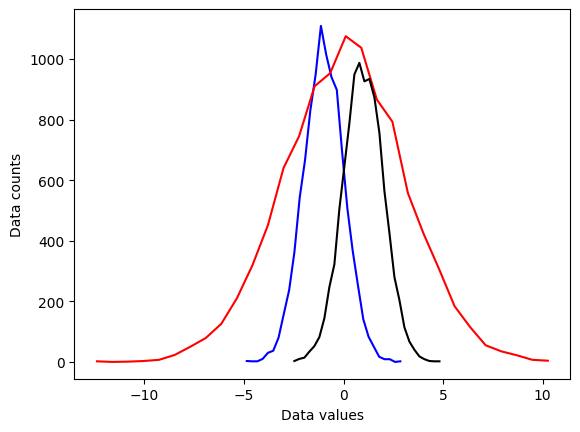

In [5]:
## create some data distributions

# the distributions
N = 10001   # number of data points
nbins = 30  # number of histogram bins

d1 = np.random.randn(N) - 1
d2 = 3*np.random.randn(N)
d3 = np.random.randn(N) + 1

# need their histograms
y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:]+x1[:-1])/2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:]+x2[:-1])/2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:]+x3[:-1])/2


# plot them
plt.plot(x1,y1,'b')
plt.plot(x2,y2,'r')
plt.plot(x3,y3,'k')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

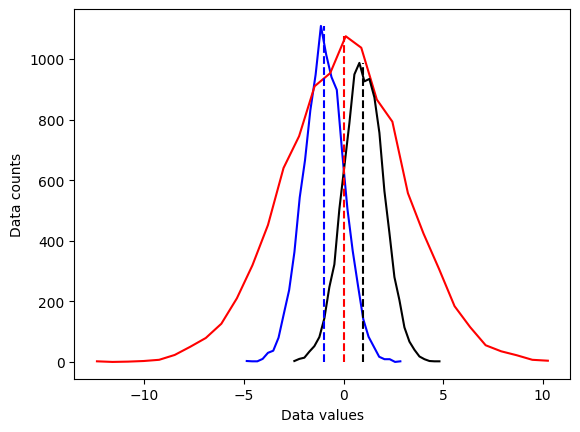

In [6]:
## overlay the mean

# compute the means
mean_d1 = sum(d1) / len(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

# plot them
plt.plot(x1,y1,'b', x2,y2,'r', x3,y3,'k')
plt.plot([mean_d1,mean_d1],[0,max(y1)],'b--')
plt.plot([mean_d2,mean_d2],[0,max(y2)],'r--')
plt.plot([mean_d3,mean_d3],[0,max(y3)],'k--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

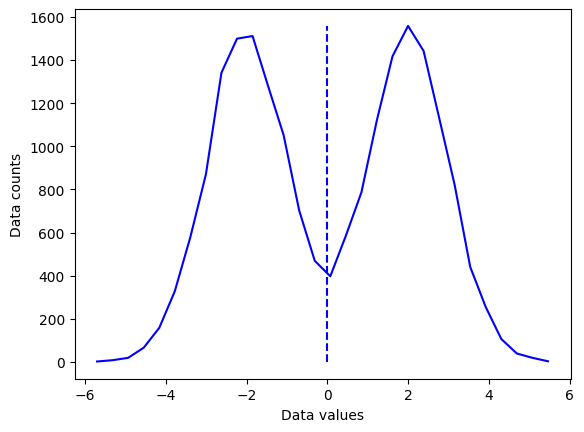

In [7]:
## "failure" of the mean

# new dataset of distribution combinations
d4 = np.hstack( (np.random.randn(N)-2,np.random.randn(N)+2) )
# and its histogram
[y4,x4] = np.histogram(d4,nbins)
x4 = (x4[:-1]+x4[1:])/2

# and its mean
mean_d4 = np.mean(d4)


plt.plot(x4,y4,'b')
plt.plot([mean_d4,mean_d4],[0,max(y4)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

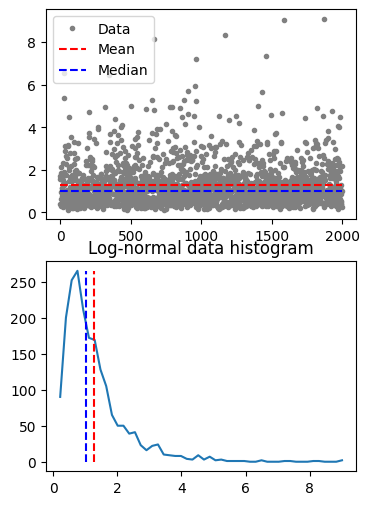

In [8]:
## median

# create a log-normal distribution
shift   = 0
stretch = .7
n       = 2000
nbins   = 50

# generate data
data = stretch*np.random.randn(n) + shift
data = np.exp( data )

# and its histogram
y,x = np.histogram(data,nbins)
x = (x[:-1]+x[1:])/2

# compute mean and median
datamean = np.mean(data)
datamedian = np.median(data)


# plot data
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(data,'.',color=[.5,.5,.5],label='Data')
ax[0].plot([1,n],[datamean,datamean],'r--',label='Mean')
ax[0].plot([1,n],[datamedian,datamedian],'b--',label='Median')
ax[0].legend()

ax[1].plot(x,y)
ax[1].plot([datamean,datamean],[0,max(y)],'r--')
ax[1].plot([datamedian,datamedian],[0,max(y)],'b--')
ax[1].set_title('Log-normal data histogram')
plt.show()

In [18]:
## mode

data = np.round(np.random.randn(10))
print(data)

uniq_data = np.unique(data)
for i in range(len(uniq_data)):
    print(f'{uniq_data[i]} appears {sum(data==uniq_data[i])} times.')

print(' ')
mode_result = stats.mode(data)
print(f'The modal value is {mode_result}')


[-0. -3.  0. -0. -2.  2. -0. -0.  0. -1.]
-3.0 appears 1 times.
-2.0 appears 1 times.
-1.0 appears 1 times.
-0.0 appears 6 times.
2.0 appears 1 times.
 
The modal value is ModeResult(mode=-0.0, count=6)


---
# Code challenge: central tendencies with outliers
---

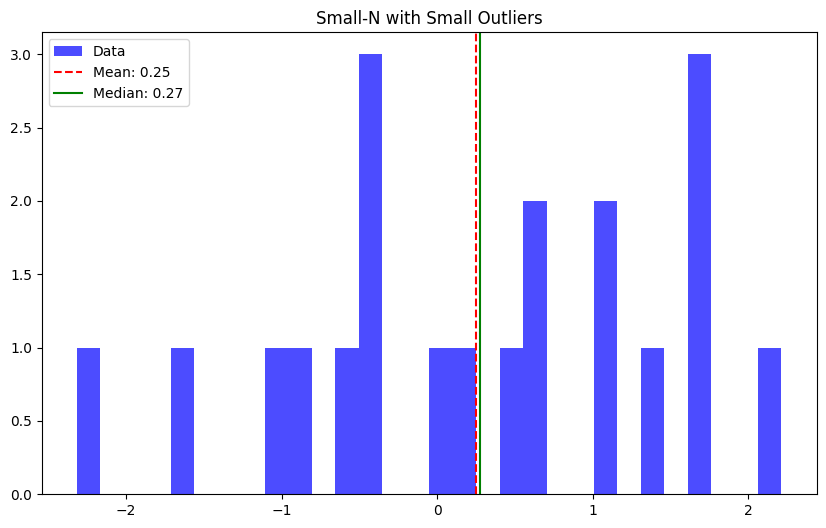

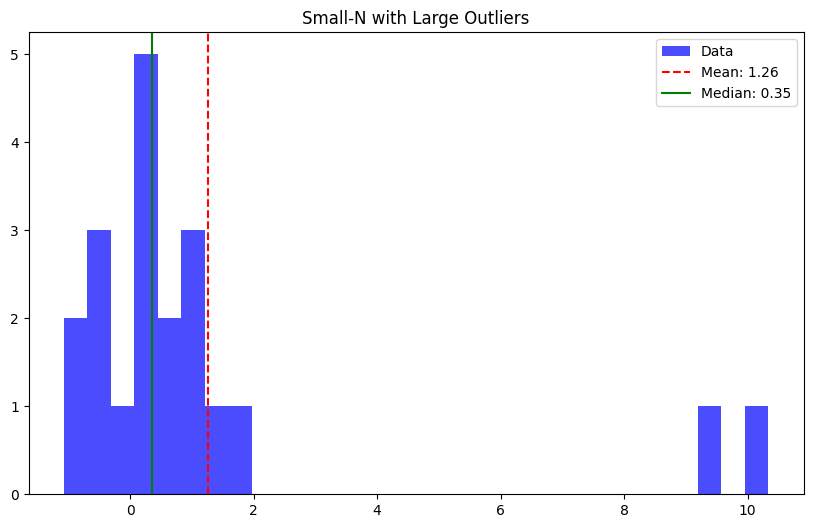

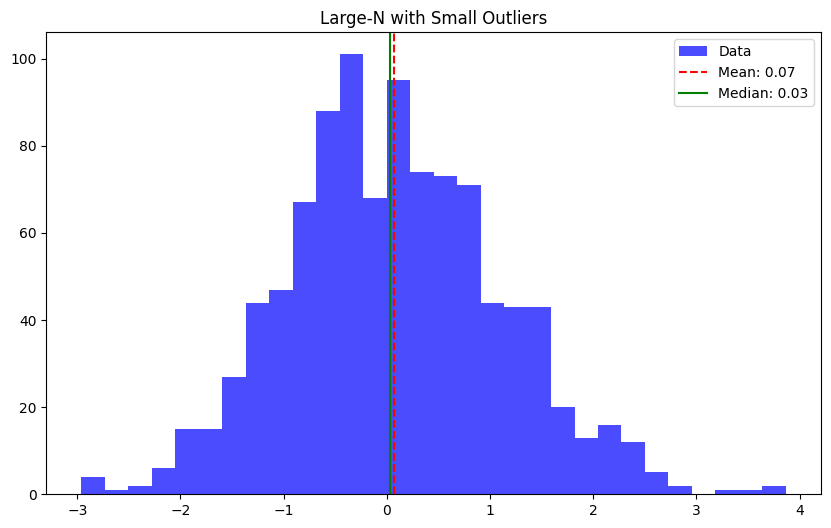

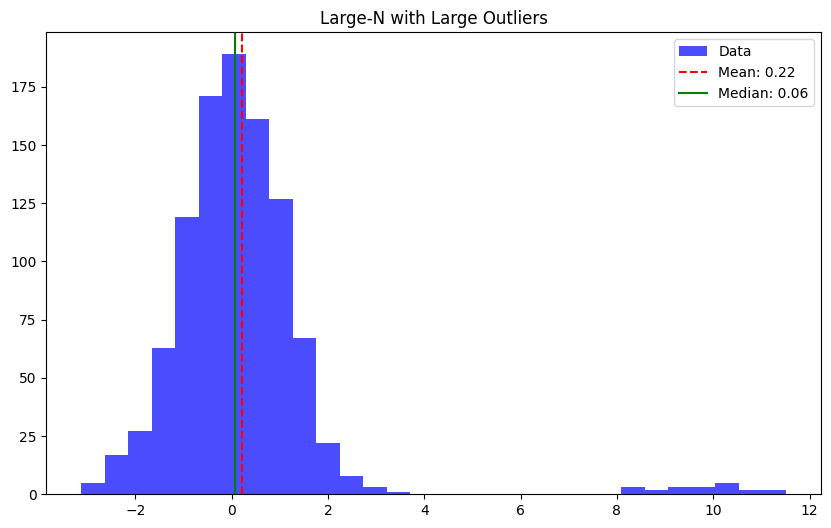

In [19]:
# Compare mean and median for distributions with:
# 1) "small" outliers
# 2) "large" outliers
# 3) small-N datasets
# 4) large-N datasets


# Function to compare mean and median
def compare_mean_median(data, title):
    mean_val = np.mean(data)
    median_val = np.median(data)

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, alpha=0.7, color='blue', label='Data')
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    plt.title(title)
    plt.legend()
    plt.show()

# Dataset 1: Small-N with small outliers
small_N = 20
data_small_outliers = np.random.normal(0, 1, small_N)
data_small_outliers[-2:] += 2  # Add small outliers
compare_mean_median(data_small_outliers, "Small-N with Small Outliers")

# Dataset 2: Small-N with large outliers
data_large_outliers = np.random.normal(0, 1, small_N)
data_large_outliers[-2:] += 10  # Add large outliers
compare_mean_median(data_large_outliers, "Small-N with Large Outliers")

# Dataset 3: Large-N with small outliers
large_N = 1000
data_largeN_small_outliers = np.random.normal(0, 1, large_N)
data_largeN_small_outliers[-20:] += 2  # Add small outliers
compare_mean_median(data_largeN_small_outliers, "Large-N with Small Outliers")

# Dataset 4: Large-N with large outliers
data_largeN_large_outliers = np.random.normal(0, 1, large_N)
data_largeN_large_outliers[-20:] += 10  # Add large outliers
compare_mean_median(data_largeN_large_outliers, "Large-N with Large Outliers")